In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sales_df = pd.read_excel("Sales_Data.xlsx")



In [ ]:
crm_rfm_modeling

In [23]:
!pip install crm_rfm_modeling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for crm_rfm_modeling: filename=crm_rfm_modeling-1.0.4-py3-none-any.whl size=6109 sha256=d44a4f0040ce61d98bd01610da2a890b59dc8f24c0065221d9b0d37dbc05b24c
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\61\1d\40\4e020f0b5ccc2e7934e5269371e537f1cdd276c4c78b3cb7b6
Successfully built crm_rfm_modeling


In [24]:
!pip install crm_rfm_modeling.rfm

ERROR: Could not find a version that satisfies the requirement crm_rfm_modeling.rfm (from versions: none)
ERROR: No matching distribution found for crm_rfm_modeling.rfm


In [3]:
display(sales_df.head().T)

,0,1,2,3,4
ORDERNUMBER,10107,10121,10134,10145,10168
QUANTITYORDERED,30,34,41,45,36
PRICEEACH,95.7,81.35,94.74,83.26,96.66
ORDERLINENUMBER,2,5,2,6,1
SALES,2871.0,2765.9,3884.34,3746.7,3479.76
ORDERDATE,2018-02-24 00:00:00,2018-05-07 00:00:00,2018-07-01 00:00:00,2018-08-25 00:00:00,2018-10-28 00:00:00
DAYS_SINCE_LASTORDER,828,757,703,649,586
STATUS,Shipped,Shipped,Shipped,Shipped,Shipped
PRODUCTLINE,Motorcycles,Motorcycles,Motorcycles,Motorcycles,Motorcycles
MSRP,95,95,95,95,95


In [6]:
sales_df.shape

(2747, 20)

In [4]:
display(sales_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

None

In [5]:
display(sales_df.iloc[:,1:19].describe(include = 'all'))


C:\Users\Dell\AppData\Local\Temp\ipykernel_7632\3409894032.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(sales_df.iloc[:,1:19].describe(include = 'all'))


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME
count,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747,2747,2747.000000,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,NaN,NaN,NaN,NaN,246,NaN,6,7,NaN,109,89,88,89,71,73,19,76,72
top,NaN,NaN,NaN,NaN,2018-11-14 00:00:00,NaN,Shipped,Classic Cars,NaN,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego
freq,NaN,NaN,NaN,NaN,38,NaN,2541,949,NaN,51,259,259,259,304,259,928,259,259
first,NaN,NaN,NaN,NaN,2018-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,35.103021,101.098951,6.491081,3553.047583,NaN,1757.085912,NaN,NaN,100.691664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.762135,42.042548,4.230544,1838.953901,NaN,819.280576,NaN,NaN,40.114802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,26.880000,1.000000,482.130000,NaN,42.000000,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,68.745000,3.000000,2204.350000,NaN,1077.000000,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
display(sales_df.isna().sum())


ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [10]:
sales_df.duplicated().sum()


0

In [7]:
sales_df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1844
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

In [98]:
cat=[]
num=[]
date=[]
for i in sales_df.columns:
    if sales_df[i].dtype=="object":
        cat.append(i)
    elif  sales_df[i].dtype=="datetime64[ns]":
        date.append(i)
    else:
        num.append(i)
print(cat) 
print(num)
print(date)


['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']
['ORDERDATE']


In [15]:
sales_df[cat].describe().T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


In [16]:
cat

['STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'CITY',
 'POSTALCODE',
 'COUNTRY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [183]:
sales_df['ORDERNUMBER'].nunique()

298

In [24]:
for i in cat:
    print ('--------Unique Values of ---',i,' and their counts')
    print (sales_df[i].value_counts())
    print ('-------------------------------------------------')

--------Unique Values of --- STATUS  and their counts
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64
-------------------------------------------------
--------Unique Values of --- PRODUCTLINE  and their counts
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64
-------------------------------------------------
--------Unique Values of --- PRODUCTCODE  and their counts
S18_3232    51
S32_2509    28
S50_1392    28
S24_2840    28
S24_1444    28
            ..
S24_2887    22
S18_2248    21
S18_1749    21
S18_4409    21
S24_3969    21
Name: PRODUCTCODE, Length: 109, dtype: int64
-------------------------------------------------
--------Unique Values of --- CUSTOMERNAME  and their counts
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.   

In [23]:
for i in cat:
    print ('--------Unique Values of ---',i,' and their counts')
    print (sales_df[i].value_counts(normalize=True))
    print ('-------------------------------------------------')

--------Unique Values of --- STATUS  and their counts
Shipped       0.925009
Cancelled     0.021842
Resolved      0.017110
On Hold       0.016017
In Process    0.014925
Disputed      0.005096
Name: STATUS, dtype: float64
-------------------------------------------------
--------Unique Values of --- PRODUCTLINE  and their counts
Classic Cars        0.345468
Vintage Cars        0.210775
Motorcycles         0.113942
Planes              0.110666
Trucks and Buses    0.107390
Ships               0.083728
Trains              0.028031
Name: PRODUCTLINE, dtype: float64
-------------------------------------------------
--------Unique Values of --- PRODUCTCODE  and their counts
S18_3232    0.018566
S32_2509    0.010193
S50_1392    0.010193
S24_2840    0.010193
S24_1444    0.010193
              ...   
S24_2887    0.008009
S18_2248    0.007645
S18_1749    0.007645
S18_4409    0.007645
S24_3969    0.007645
Name: PRODUCTCODE, Length: 109, dtype: float64
----------------------------------------------

### EDA

In [93]:
labels=['Small', 'Medium', 'Large']
labels

['Small', 'Medium', 'Large']

In [ ]:
Counts =[1246,1349,152]
Counts

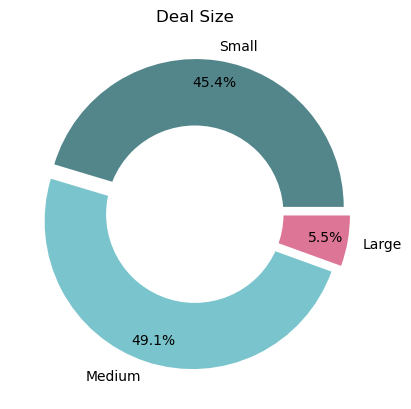

In [98]:
import matplotlib.pyplot as plt
 
# Setting labels for items in Chart
labels = ['Small', 'Medium', 'Large']
 
# Setting size in Chart based on 
# given values
Counts = [1246,1349,152]
 
# colors
colors = ['#53868B', '#7AC5CD', '#DD7596']
# explosion
explode = (0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(Counts, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Deal Size')
 
# Displaying Chart
plt.show()

In [149]:

labels=['Shipped', 'Cancelled', 'Resolved', 'On Hold', 'In Process',
       'Disputed']
labels

['Shipped', 'Cancelled', 'Resolved', 'On Hold', 'In Process', 'Disputed']

In [150]:
Counts =[2541,   60,   47,   44,   41,   14]
Counts

[2541, 60, 47, 44, 41, 14]

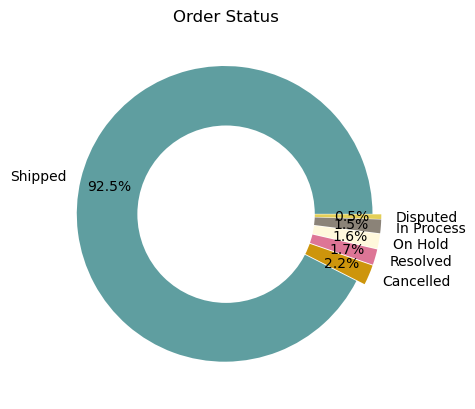

In [184]:
import matplotlib.pyplot as plt
 
# Setting labels for items in Chart
Employee = labels
 
# Setting size in Chart based on 
# given values
Salary = Counts
 
# colors
colors= ['#5F9EA0', '#CD950C', '#DD7596', '#FFF8DC','#8B8378','#E3CF57']
# explosion
explode = (0.01, 0.05, 0.05, 0.05, 0.05,0.05)
 
# Pie Chart
plt.pie(Salary, labels=Employee,colors=colors,
        autopct='%1.1f%%', pctdistance=0.80,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Order Status')
 
# Displaying Chart
plt.show()

In [ ]:
labels=['Shipped', 'Cancelled', 'Resolved', 'On Hold', 'In Process',
       'Disputed']
labels

In [138]:
sales_df['PRODUCTLINE'].value_counts().index

Index(['Classic Cars', 'Vintage Cars', 'Motorcycles', 'Planes',
       'Trucks and Buses', 'Ships', 'Trains'],
      dtype='object')

In [140]:
labels=['Classic Cars', 'Vintage Cars', 'Motorcycles', 'Planes',
       'Trucks and Buses', 'Ships', 'Trains']

In [139]:
sales_df['PRODUCTLINE'].value_counts().values

array([949, 579, 313, 304, 295, 230,  77], dtype=int64)

In [141]:
Counts=[949, 579, 313, 304, 295, 230,  77]

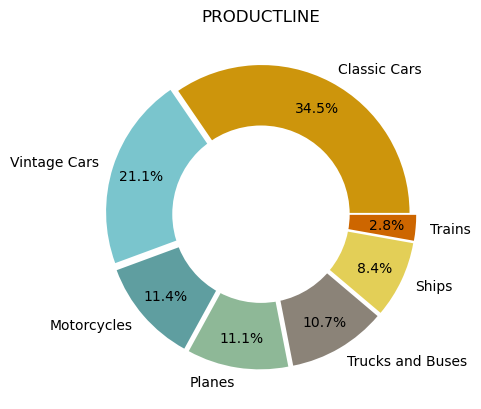

In [147]:
import matplotlib.pyplot as plt
 

# colors
colors= ['#CD950C', '#7AC5CD', '#5F9EA0', '#8EB897','#8B8378','#E3CF57','#CD6600']
# explosion
explode = (0.01, 0.05, 0.05, 0.05, 0.05,0.05,0.05)
 
# Pie Chart
plt.pie(Counts, labels=labels,colors=colors,
        autopct='%1.1f%%', pctdistance=0.80,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('PRODUCTLINE')
 
# Displaying Chart
plt.show()

In [7]:
sales_df['month'] = sales_df['ORDERDATE'].dt.month

In [8]:
sales_df['Year'] = sales_df['ORDERDATE'].dt.year

In [9]:
sales_df['Quarter'] = sales_df['ORDERDATE'].dt.quarter

In [11]:
sales_df['month']=sales_df['month'].astype('object')

In [13]:
sales_df['Year']=sales_df['Year'].astype('object')
sales_df['Quarter']=sales_df['Quarter'].astype('object')

In [10]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,month,Year,Quarter
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2,2018,1
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,5,2018,2
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,7,2018,3
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,8,2018,3
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,10,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small,12,2019,4
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,...,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium,1,2020,1
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,3,2020,1
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,...,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small,3,2020,1


In [16]:
monthly_sales=sales_df.groupby('month')['SALES'].sum()

In [21]:
month=pd.array(monthly_sales.index)

In [22]:
month

<PandasArray>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Length: 12, dtype: int64

In [19]:
monthly_sales.values

array([ 761985.12,  756238.28,  735805.81,  669390.96,  923972.56,
        454756.78,  514875.97,  659310.57,  584724.27, 1001377.2 ,
       2088536.95,  609247.24])

In [68]:
Yearly_product_sales_2018=sales_df[sales_df['Year']==2018].groupby(['PRODUCTLINE'])['SALES'].sum()

In [70]:
Yearly_product_sales_2019=sales_df[sales_df['Year']==2019].groupby(['PRODUCTLINE'])['SALES'].sum()

In [71]:
Yearly_product_sales_2020=sales_df[sales_df['Year']==2020].groupby(['PRODUCTLINE'])['SALES'].sum()

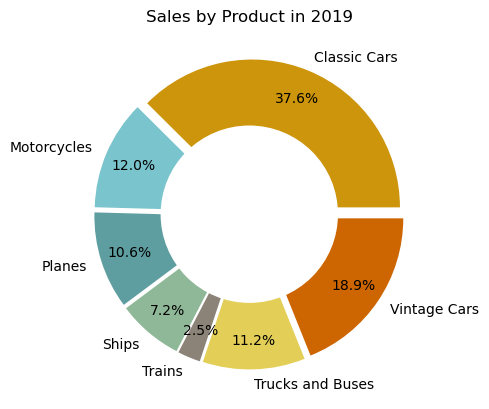

In [73]:
import matplotlib.pyplot as plt
 
sums=Yearly_product_sales_2019.values
labels=Yearly_product_sales_2019.index
# colors
colors= ['#CD950C', '#7AC5CD', '#5F9EA0', '#8EB897','#8B8378','#E3CF57','#CD6600']
# explosion
explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05)
 
# Pie Chart
plt.pie(sums, labels=labels,colors=colors,
        autopct='%1.1f%%', pctdistance=0.80,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Sales by Product in 2019')
 
# Displaying Chart
plt.show()

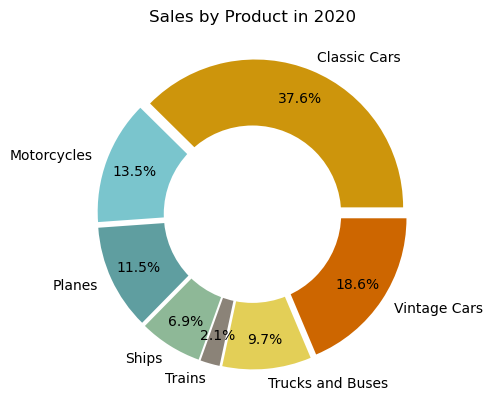

In [76]:
import matplotlib.pyplot as plt
 
sums=Yearly_product_sales_2020.values
labels=Yearly_product_sales_2020.index
# colors
colors= ['#CD950C', '#7AC5CD', '#5F9EA0', '#8EB897','#8B8378','#E3CF57','#CD6600']
# explosion
explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05)
 
# Pie Chart
plt.pie(sums, labels=labels,colors=colors,
        autopct='%1.1f%%', pctdistance=0.80,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Sales by Product in 2020')
 
# Displaying Chart
plt.show()

In [78]:
sales_df['DEALSIZE'].value_counts().index

Index(['Medium', 'Small', 'Large'], dtype='object')

In [79]:
sales_df['DEALSIZE'].value_counts().values

array([1349, 1246,  152], dtype=int64)

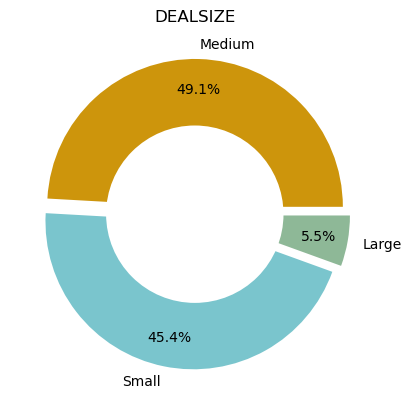

In [82]:
import matplotlib.pyplot as plt
 
sums=sales_df['DEALSIZE'].value_counts().values
labels=sales_df['DEALSIZE'].value_counts().index
# colors
colors= ['#CD950C', '#7AC5CD', '#8EB897']
# explosion
explode = (0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(sums, labels=labels,colors=colors,
        autopct='%1.1f%%', pctdistance=0.80,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('DEALSIZE')
 
# Displaying Chart
plt.show()

<AxesSubplot:xlabel='SALES', ylabel='Count'>

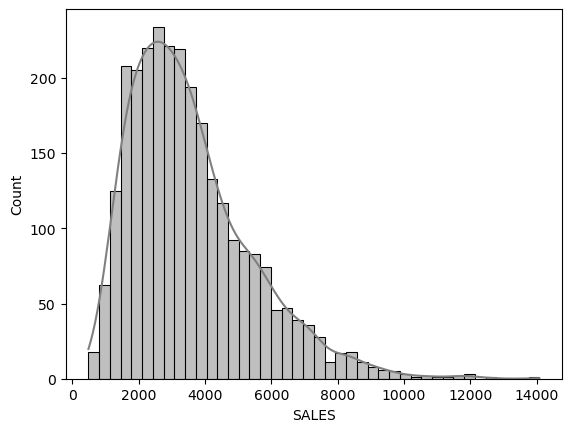

In [172]:
sns.histplot(data=sales_df,x='SALES',kde=True,color='grey')


<AxesSubplot:xlabel='QUANTITYORDERED', ylabel='Count'>

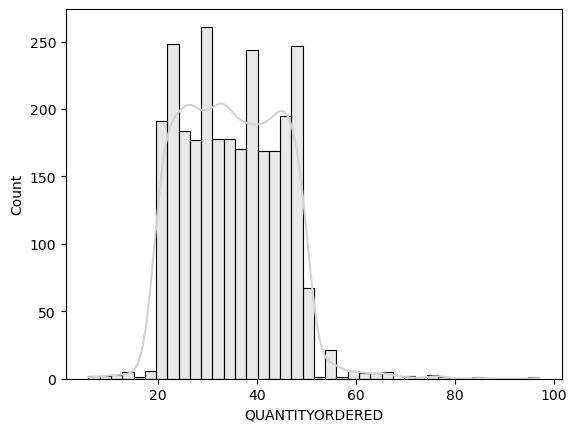

In [94]:
sns.histplot(data=sales_df,x='QUANTITYORDERED',kde=True,color='lightgrey')

<AxesSubplot:xlabel='QUANTITYORDERED'>

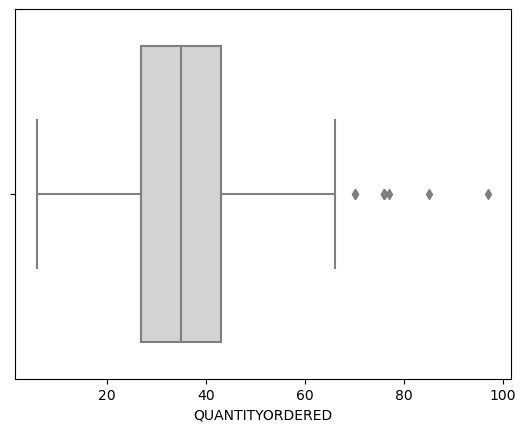

In [4]:
sns.boxplot(data=sales_df,x='QUANTITYORDERED',color='lightgrey')

<AxesSubplot:xlabel='SALES'>

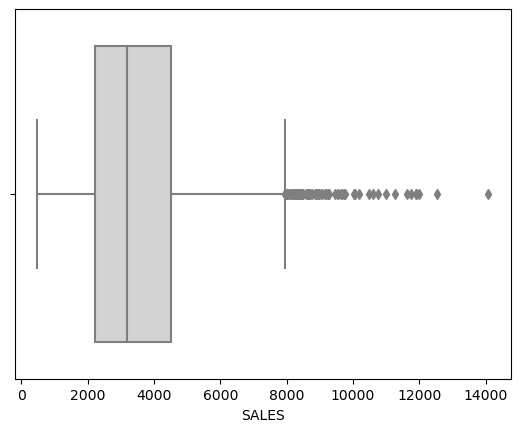

In [86]:
sns.boxplot(data=sales_df,x='SALES',color='lightgrey')

<AxesSubplot:xlabel='PRICEEACH'>

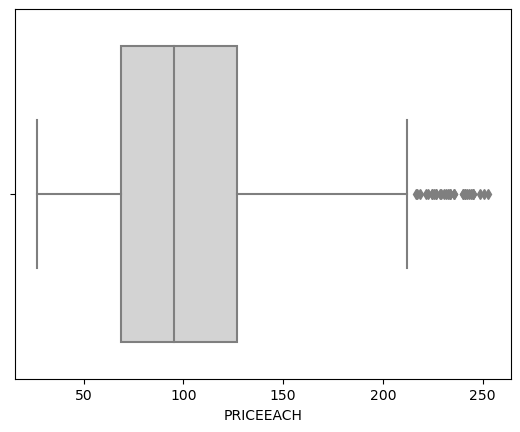

In [91]:
sns.boxplot(data=sales_df,x='PRICEEACH',color='lightgrey')

<AxesSubplot:xlabel='MSRP'>

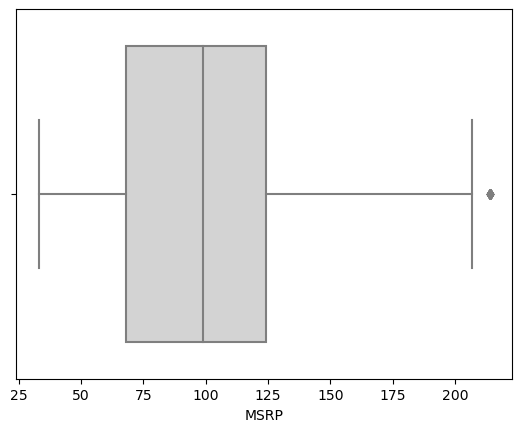

In [95]:
sns.boxplot(data=sales_df,x='MSRP',color='lightgrey')

Text(0.5, 1.0, 'Sales per order')

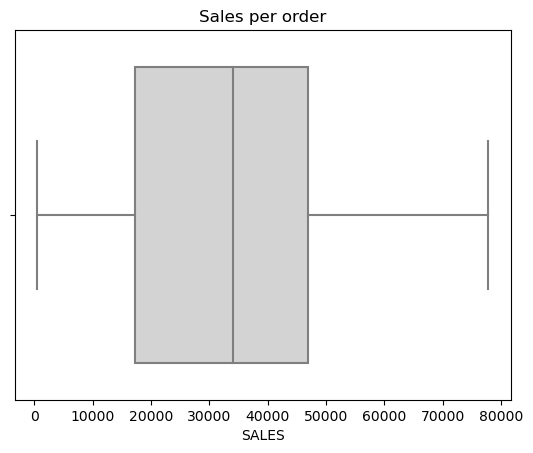

In [89]:
sns.boxplot(x=sales_df.groupby('ORDERNUMBER')['SALES'].sum(),color='lightgrey')
plt.title("Sales per order")

Text(0.5, 1.0, 'Price Product Category')

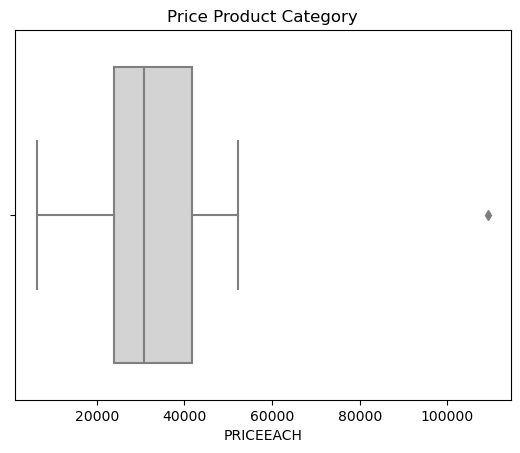

In [92]:
sns.boxplot(x=sales_df.groupby('PRODUCTLINE')['PRICEEACH'].sum(),color='lightgrey')
plt.title("Price Product Category")

<AxesSubplot:xlabel='SALES', ylabel='PRODUCTLINE'>

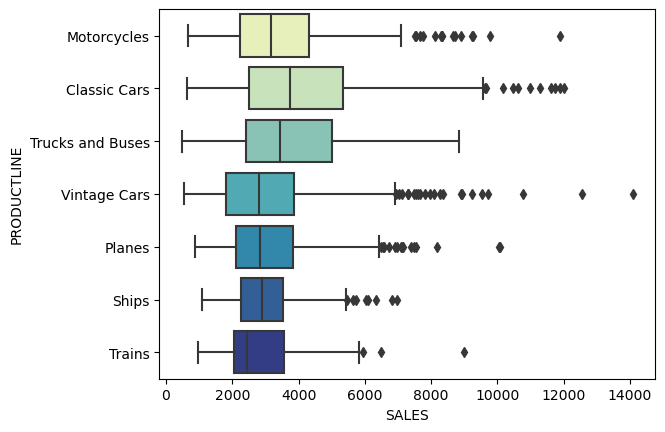

In [112]:
sns.boxplot(data=sales_df,x='SALES',y='PRODUCTLINE',palette='YlGnBu')

In [136]:
display(sales_df[sales_df['PRODUCTLINE']=='Classic Cars']['SALES'].describe())
display(sales_df[sales_df['PRODUCTLINE']=='Vintage Cars']['SALES'].describe())
display(sales_df[sales_df['PRODUCTLINE']=='Motorcycles']['SALES'].describe())
display(sales_df[sales_df['PRODUCTLINE']=='Trucks and Buses']['SALES'].describe())
display(sales_df[sales_df['PRODUCTLINE']=='Planes']['SALES'].describe())
display(sales_df[sales_df['PRODUCTLINE']=='Ships']['SALES'].describe())
display(sales_df[sales_df['PRODUCTLINE']=='Trains']['SALES'].describe())


count      949.000000
mean      4049.387292
std       2051.804511
min        640.050000
25%       2492.880000
50%       3754.050000
75%       5331.880000
max      12001.000000
Name: SALES, dtype: float64

count      579.000000
mean      3120.337962
std       1771.064556
min        541.140000
25%       1806.670000
50%       2795.270000
75%       3851.925000
max      14082.800000
Name: SALES, dtype: float64

count      313.000000
mean      3525.598051
std       1836.384071
min        651.800000
25%       2220.720000
50%       3153.600000
75%       4326.800000
max      11886.600000
Name: SALES, dtype: float64

count     295.000000
mean     3767.997254
std      1674.055922
min       482.130000
25%      2421.975000
50%      3451.000000
75%      4997.845000
max      8844.120000
Name: SALES, dtype: float64

count      304.000000
mean      3188.563882
std       1523.238641
min        875.910000
25%       2109.205000
50%       2841.805000
75%       3843.400000
max      10066.600000
Name: SALES, dtype: float64

count     230.000000
mean     3043.648783
std      1058.752936
min      1089.360000
25%      2261.295000
50%      2884.925000
75%      3531.920000
max      6960.480000
Name: SALES, dtype: float64

count      77.000000
mean     2938.226883
std      1456.595976
min       972.400000
25%      2051.560000
50%      2445.600000
75%      3564.750000
max      8977.050000
Name: SALES, dtype: float64

<AxesSubplot:xlabel='SALES', ylabel='STATUS'>

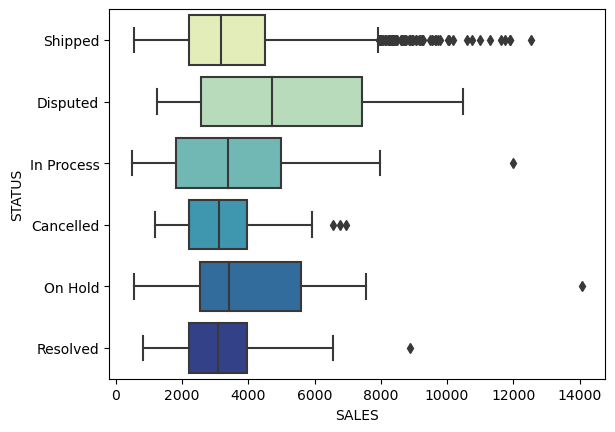

In [113]:
sns.boxplot(data=sales_df,x='SALES',y='STATUS',palette='YlGnBu')

In [137]:
display(sales_df[sales_df['STATUS']=='Shipped']['SALES'].describe())
display(sales_df[sales_df['STATUS']=='Disputed']['SALES'].describe())
display(sales_df[sales_df['STATUS']=='In Process']['SALES'].describe())
display(sales_df[sales_df['STATUS']=='Cancelled']['SALES'].describe())
display(sales_df[sales_df['STATUS']=='On Hold']['SALES'].describe())
display(sales_df[sales_df['STATUS']=='Resolved']['SALES'].describe())


count     2541.000000
mean      3549.426974
std       1819.785278
min        553.950000
25%       2206.600000
50%       3183.290000
75%       4496.800000
max      12536.500000
Name: SALES, dtype: float64

count       14.000000
mean      5158.061429
std       3057.907990
min       1254.600000
25%       2582.315000
50%       4718.700000
75%       7429.380000
max      10468.900000
Name: SALES, dtype: float64

count       41.000000
mean      3529.999024
std       2327.378540
min        482.130000
25%       1828.000000
50%       3385.900000
75%       4977.000000
max      12001.000000
Name: SALES, dtype: float64

count      60.000000
mean     3241.458000
std      1391.864036
min      1199.310000
25%      2203.687500
50%      3108.715000
75%      3949.265000
max      6960.480000
Name: SALES, dtype: float64

count       44.000000
mean      4067.708864
std       2406.605573
min        541.140000
25%       2541.997500
50%       3434.425000
75%       5598.150000
max      14082.800000
Name: SALES, dtype: float64

count      47.000000
mean     3206.771915
std      1574.041518
min       834.670000
25%      2207.020000
50%      3102.080000
75%      3972.600000
max      8884.800000
Name: SALES, dtype: float64

<AxesSubplot:xlabel='SALES', ylabel='STATUS'>

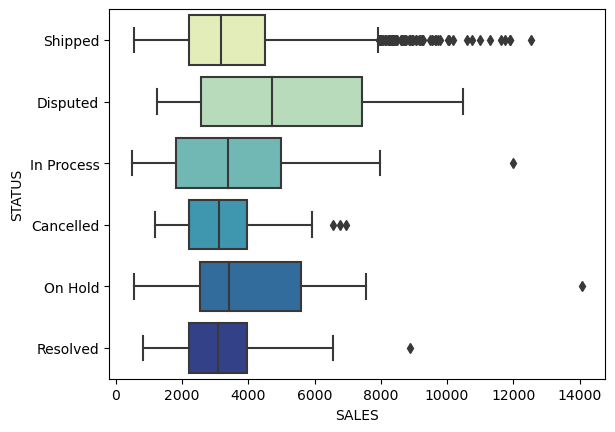

In [146]:
sns.boxplot(data=sales_df,x='SALES',y='STATUS',palette='YlGnBu')

<AxesSubplot:>

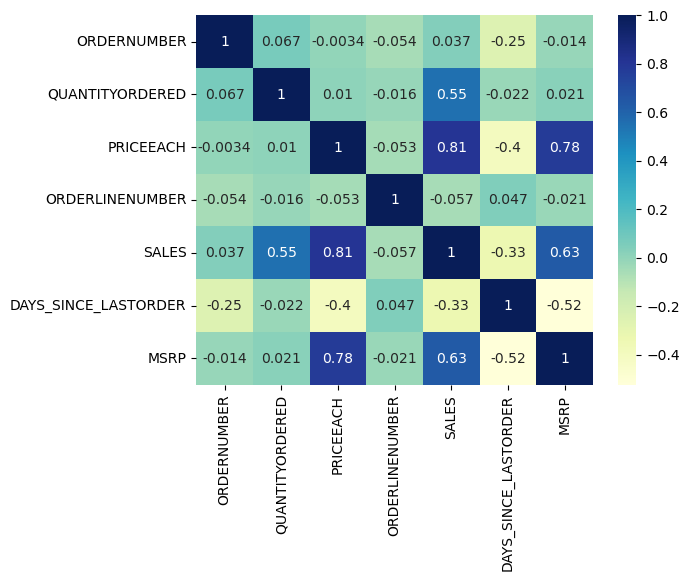

In [147]:
sns.heatmap(sales_df[num].corr(),annot=True,cmap ='YlGnBu')

In [19]:
product_sales =pd.DataFrame(sales_df.groupby('PRODUCTLINE')['SALES'].sum())

In [20]:
product_sales['%SALES']=product_sales['SALES']/(product_sales['SALES'].sum()))

In [21]:
product_sales

,SALES,%SALES
PRODUCTLINE,,
Classic Cars,3842868.54,0.393728
Motorcycles,1103512.19,0.113062
Planes,969323.42,0.099314
Ships,700039.22,0.071724
Trains,226243.47,0.023180
Trucks and Buses,1111559.19,0.113887
Vintage Cars,1806675.68,0.185106


In [12]:
product_sales.index

Index(['Classic Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains',
       'Trucks and Buses', 'Vintage Cars'],
      dtype='object', name='PRODUCTLINE')

In [13]:
product_sales.values

array([[3842868.54],
       [1103512.19],
       [ 969323.42],
       [ 700039.22],
       [ 226243.47],
       [1111559.19],
       [1806675.68]])

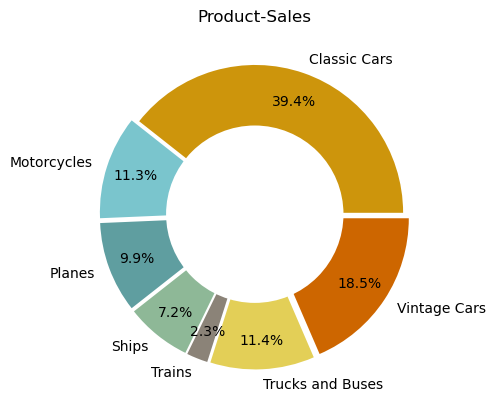

In [25]:
import matplotlib.pyplot as plt
 
# Setting labels for items in Chart
labels = ['Classic Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains',
       'Trucks and Buses', 'Vintage Cars']
 
# Setting size in Chart based on 
# given values
counts = [3842868.54,
       1103512.19,
        969323.42,
        700039.22,
        226243.47,
       1111559.19,
       1806675.68]
 
# colors
colors= ['#CD950C', '#7AC5CD', '#5F9EA0', '#8EB897','#8B8378','#E3CF57','#CD6600']
# explosion
explode = (0.01, 0.05, 0.05, 0.05, 0.05,0.05,0.05)
 
# Pie Chart
plt.pie(counts, labels=labels,colors=colors,
        autopct='%1.1f%%', pctdistance=0.80,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Product-Sales')
 
# Displaying Chart
plt.show()

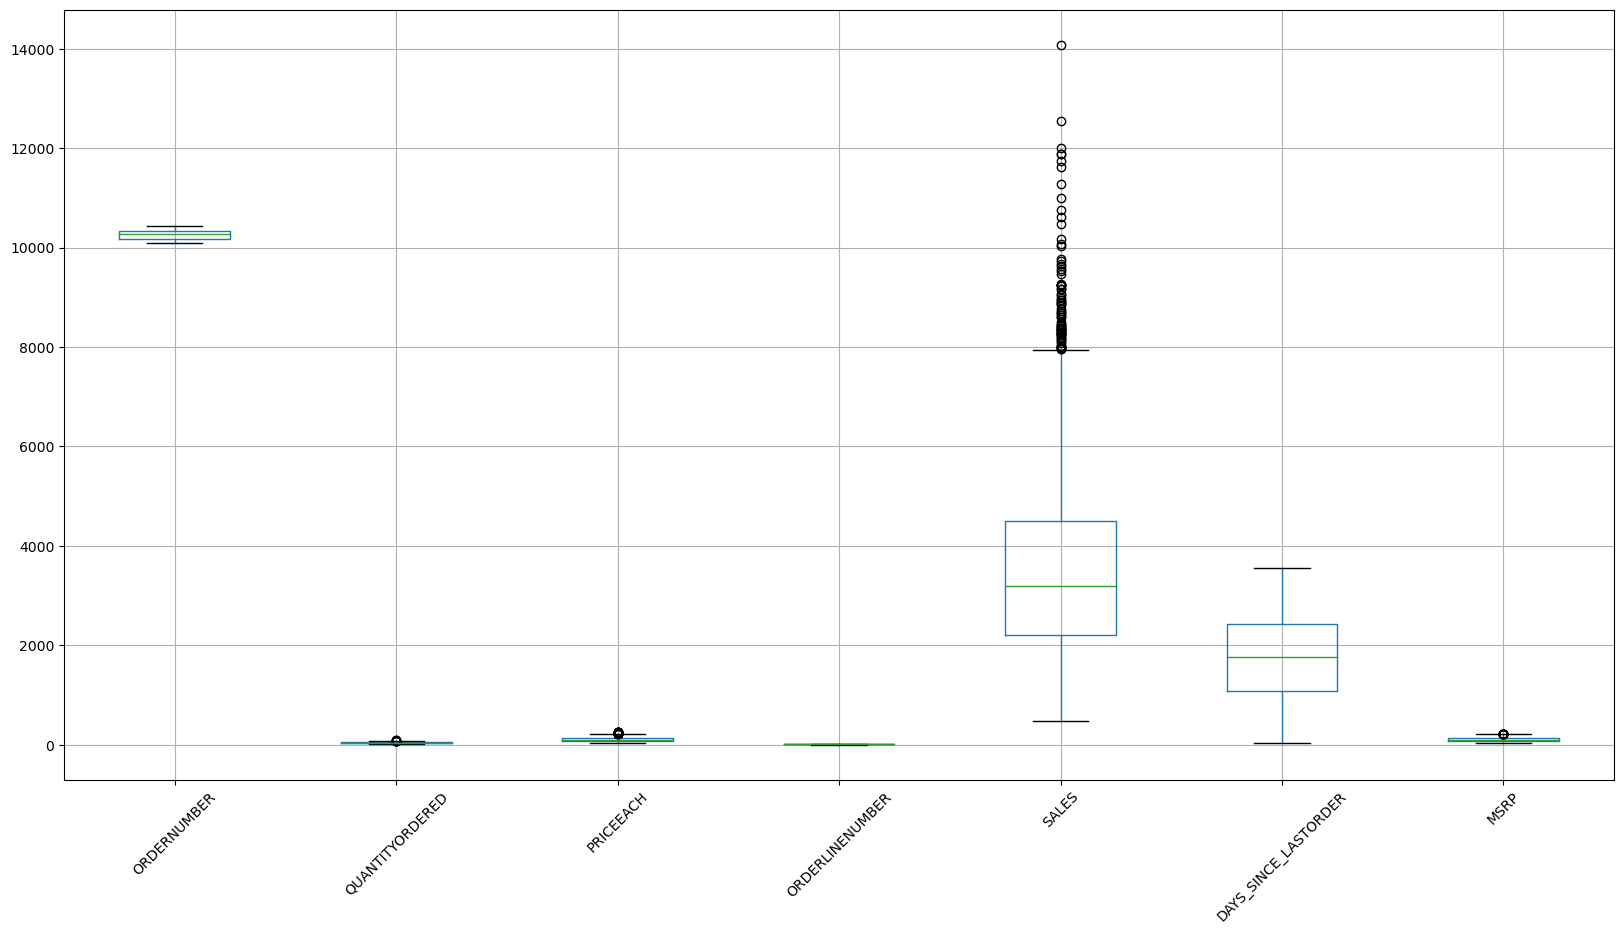

In [180]:
sales_df[num].boxplot(figsize=(20,10),rot=45)
plt.show()

In [13]:
sales_df[num].describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


<AxesSubplot:>

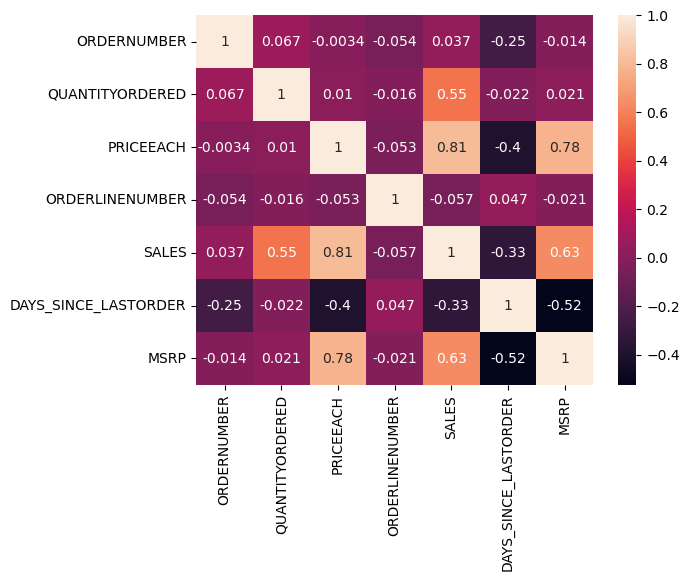

In [30]:
sns.heatmap(sales_df[num].corr(),annot=True)

### RFM In Python

In [4]:
from datetime import datetime
now = datetime.now()

In [9]:
sales_df['recency_days']= sales_df['ORDERDATE'].apply(lambda x:now-x)

sales_df['recency_days']= sales_df['recency_days'].apply(lambda x:x.days)

In [14]:
df_rfm=sales_df.rename(columns={'SALES':'monetary','recency_days':'recency'})

In [15]:
df_rfm

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,monetary,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,recency
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2064
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,1992
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,1937
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,1882
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,1818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small,1418
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,...,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium,1358
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,1328
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,...,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small,1301


In [21]:

result = df_rfm.groupby('CUSTOMERNAME').agg(recency=('recency', 'min'), monetary=('monetary', 'sum'),frequency=('ORDERNUMBER', 'nunique'))
print(result)

                             recency   monetary  frequency
CUSTOMERNAME                                              
AV Stores, Co.                  1433  157807.81          3
Alpha Cognac                    1301   70488.44          3
Amica Models & Co.              1502   94117.26          2
Anna's Decorations, Ltd         1320  153996.13          4
Atelier graphique               1425   24179.96          3
...                              ...        ...        ...
Vida Sport, Ltd                 1512  117713.56          2
Vitachrome Inc.                 1445   88041.26          3
Volvo Model Replicas, Co        1431   75754.88          4
West Coast Collectables Co.     1725   46084.64          2
giftsbymail.co.uk               1449   78240.84          2

[89 rows x 3 columns]


In [25]:
from crm_rfm_modeling import rfm



In [26]:
from crm_rfm_modeling.rfm import RFM

In [27]:

model = RFM(weights=(0.33, 0.33, 0.34))

In [28]:
model.fit(result)


In [29]:
model.summary_statistics()

,recency_scores,frequency_scores,monetary_scores
4,0.202247,0.168539,0.202247
1,0.202247,0.314607,0.202247
5,0.202247,0.067416,0.202247
2,0.202247,0.449438,0.202247
3,0.191011,0.000000,0.191011


In [30]:
pd.DataFrame(model.cutoffs)

,recency,frequency,monetary
0,"(1732, 1495.4)","(1, 2.0)","(9129.35, 64737.176)"
1,"(1495.4, 1434.8)","(2.0, 3.0)","(64737.176, 79665.35200000001)"
2,"(1434.8, 1382.2)","(3.0, 3.0)","(79665.35200000001, 100537.75600000001)"
3,"(1382.2, 1290.6)","(3.0, 4.0)","(100537.75600000001, 132714.912)"
4,"(1290.6, 1237)","(4.0, 26)","(132714.912, 912294.11)"


In [31]:
df_fitted=model.fitted_data
df_fitted.head()

,recency,monetary,frequency,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted
CUSTOMERNAME,,,,,,,,,
"AV Stores, Co.",1433,157807.81,3,3,2,5,0.99,0.66,1.70
Alpha Cognac,1301,70488.44,3,4,2,2,1.32,0.66,0.68
Amica Models & Co.,1502,94117.26,2,1,1,3,0.33,0.33,1.02
"Anna's Decorations, Ltd",1320,153996.13,4,4,4,5,1.32,1.32,1.70
Atelier graphique,1425,24179.96,3,3,2,1,0.99,0.66,0.34


In [36]:
df_fitted.sort_values(['recency_scores','frequency_scores','monetary_scores'],ascending=[False,False,False]).head(20)

,recency,monetary,frequency,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted
CUSTOMERNAME,,,,,,,,,
Danish Wholesale Imports,1283,145041.60,5,5,5,5,1.65,1.65,1.70
Euro Shopping Channel,1237,912294.11,26,5,5,5,1.65,1.65,1.70
Mini Gifts Distributors Ltd.,1239,654858.06,17,5,5,5,1.65,1.65,1.70
La Rochelle Gifts,1237,180124.90,4,5,4,5,1.65,1.32,1.70
Salzburg Collectables,1251,149798.63,4,5,4,5,1.65,1.32,1.70
Souveniers And Things Co.,1239,151570.98,4,5,4,5,1.65,1.32,1.70
The Sharp Gifts Warehouse,1276,160010.27,4,5,4,5,1.65,1.32,1.70
Diecast Classics Inc.,1238,122138.14,4,5,4,4,1.65,1.32,1.36
Handji Gifts& Co,1275,115498.73,4,5,4,4,1.65,1.32,1.36


In [37]:
df_fitted.to_excel('pandas_to_excel.xlsx', sheet_name='new_sheet_name')


In [33]:
df_fitted[df_fitted.monetary_scores==5].head()

,recency,monetary,frequency,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted
CUSTOMERNAME,,,,,,,,,
"AV Stores, Co.",1433,157807.81,3,3,2,5,0.99,0.66,1.7
"Anna's Decorations, Ltd",1320,153996.13,4,4,4,5,1.32,1.32,1.7
"Australian Collectors, Co.",1421,200995.41,5,3,5,5,0.99,1.65,1.7
Danish Wholesale Imports,1283,145041.60,5,5,5,5,1.65,1.65,1.7
"Dragon Souveniers, Ltd.",1327,172989.68,5,4,5,5,1.32,1.65,1.7


In [35]:
df_fitted.sort_values(['recency_scores','frequency_scores','monetary_scores'],ascending=[True,True,True]).head(10)

,recency,monetary,frequency,recency_scores,frequency_scores,monetary_scores,recency_weighted,frequency_weighted,monetary_weighted
CUSTOMERNAME,,,,,,,,,
"Bavarian Collectables Imports, Co.",1496,34993.92,1,1,1,1,0.33,0.33,0.34
CAF Imports,1676,49642.05,2,1,1,1,0.33,0.33,0.34
Cambridge Collectables Co.,1626,36163.62,2,1,1,1,0.33,0.33,0.34
"Double Decker Gift Stores, Ltd",1732,36019.04,2,1,1,1,0.33,0.33,0.34
Online Mini Collectables,1501,57197.96,2,1,1,1,0.33,0.33,0.34
Signal Collectibles Ltd.,1713,50218.51,2,1,1,1,0.33,0.33,0.34
West Coast Collectables Co.,1725,46084.64,2,1,1,1,0.33,0.33,0.34
Daedalus Designs Imports,1702,69052.41,2,1,1,2,0.33,0.33,0.68
Diecast Collectables,1638,70859.78,2,1,1,2,0.33,0.33,0.68
